In [1]:
!pip install pandas matplotlib numpy seaborn scikit-learn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import sklearn
import requests
import json

In [3]:
# mcolors.BASE_COLORS #these colors can be called with a single character

# mcolors.TABLEAU_COLORS #the default color cycle colors

# mcolors.CSS4_COLORS #named colors also recognized in css

# mcolors.XKCD_COLORS #named colors from the xkcd survey

In [9]:
data = pd.read_csv(r"C:\Users\USER\Desktop\St andrews\CS5098\Data\Altmetric\Altmetric_Queen Margaret University.csv")
#C:\Users\USER\Desktop\St andrews\CS5098\Data\Altmetric
data.head()

,Mention Type,Mention Date,Outlet or Author,Mention Title,Country,External Mention ID,Mention URL,Research Output Title,Journal/Collection Title,Authors at my Institution,...,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,ADS Bibcode,arXiv ID,RePEc ID,SSRN,URN,Publisher Names
0,Wikipedia page,2024-05-22 19:58:29,NaN,پرستاری,NaN,NaN,http://fa.wikipedia.org/?diff=prev&oldid=39569...,Global nursing shortages,British Medical Journal,NaN,...,NaN,11923146.0,PMC1122695,NaN,NaN,NaN,NaN,NaN,NaN,BMJ Group; StatRef
1,Wikipedia page,2024-05-12 21:38:25,NaN,پرستاری,NaN,NaN,http://fa.wikipedia.org/?diff=prev&oldid=39502...,Spiritual aspects of nursing,Journal of Advanced Nursing,NaN,...,http://doi.wiley.com/10.1111/j.1365-2648.1994....,8014303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StatRef; Wiley
2,Wikipedia page,2024-04-16 21:29:31,NaN,Nursing,NaN,NaN,http://en.wikipedia.org/?diff=prev&oldid=12192...,Spiritual aspects of nursing,Journal of Advanced Nursing,NaN,...,http://doi.wiley.com/10.1111/j.1365-2648.1994....,8014303.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,StatRef; Wiley
3,Wikipedia page,2024-04-03 18:25:36,NaN,Henrietta Green,NaN,NaN,http://en.wikipedia.org/?diff=prev&oldid=12170...,Food Quality and Consumer Value,NaN,NaN,...,http://books.google.com/books?id=ErUbOaKICUMC&...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Springer Nature
4,Wikipedia page,2023-12-15 16:11:56,NaN,Toast (food),NaN,NaN,http://en.wikipedia.org/?diff=prev&oldid=11900...,Food Quality and Consumer Value,NaN,NaN,...,http://books.google.com/books?id=ErUbOaKICUMC&...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Springer Nature


In [20]:
data_extra = data.copy(deep=True)
data_extra = data_extra.dropna(axis=1, how='all')
data_extra =data_extra.drop(columns =['Mention Type','Authors at my Institution','Departments'],axis=1)
data_extra

,Mention Date,Mention Title,Mention URL,Research Output Title,Journal/Collection Title,Output Type,Subjects (FoR),Affiliations (GRID),Publication Date,Altmetric Attention Score,Details Page URL,DOI,ISBN,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,Publisher Names
0,2024-05-22 19:58:29,پرستاری,http://fa.wikipedia.org/?diff=prev&oldid=39569...,Global nursing shortages,British Medical Journal,Article,32 Biomedical and Clinical Sciences; 42 Health...,Queen Margaret University,2002-03-30,38,https://www.altmetric.com/details/742104,10.1136/bmj.324.7340.751,NaN,NaN,11923146.0,PMC1122695,NaN,BMJ Group; StatRef
1,2024-05-12 21:38:25,پرستاری,http://fa.wikipedia.org/?diff=prev&oldid=39502...,Spiritual aspects of nursing,Journal of Advanced Nursing,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2006-02-15,6,https://www.altmetric.com/details/15638251,10.1111/j.1365-2648.1994.tb01105.x,NaN,http://doi.wiley.com/10.1111/j.1365-2648.1994....,8014303.0,NaN,NaN,StatRef; Wiley
2,2024-04-16 21:29:31,Nursing,http://en.wikipedia.org/?diff=prev&oldid=12192...,Spiritual aspects of nursing,Journal of Advanced Nursing,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2006-02-15,6,https://www.altmetric.com/details/15638251,10.1111/j.1365-2648.1994.tb01105.x,NaN,http://doi.wiley.com/10.1111/j.1365-2648.1994....,8014303.0,NaN,NaN,StatRef; Wiley
3,2024-04-03 18:25:36,Henrietta Green,http://en.wikipedia.org/?diff=prev&oldid=12170...,Food Quality and Consumer Value,NaN,Book,"35 Commerce, Management, Tourism and Services;...",Queen Margaret University,2003-01-16,4,https://www.altmetric.com/details/32118061,10.1007/978-3-662-07283-7,9.783540e+12,http://books.google.com/books?id=ErUbOaKICUMC&...,NaN,NaN,NaN,Springer Nature
4,2023-12-15 16:11:56,Toast (food),http://en.wikipedia.org/?diff=prev&oldid=11900...,Food Quality and Consumer Value,NaN,Book,"35 Commerce, Management, Tourism and Services;...",Queen Margaret University,2003-01-16,4,https://www.altmetric.com/details/32118061,10.1007/978-3-662-07283-7,9.783540e+12,http://books.google.com/books?id=ErUbOaKICUMC&...,NaN,NaN,NaN,Springer Nature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2010-11-19 21:24:12,Communities That Care,http://en.wikipedia.org/?diff=prev&oldid=39774...,What Motivates People to Participate More in C...,American Journal of Community Psychology,Article,52 Psychology; 5201 Applied and Developmental ...,Pennsylvania State University; Queen Margaret ...,2008-07-02,3,https://www.altmetric.com/details/3603583,10.1007/s10464-008-9182-z,NaN,NaN,18594964.0,PMC5696652,NaN,Springer Nature; Wiley
118,2010-07-07 20:44:54,蕪菁甘藍,http://zh.wikipedia.org/?diff=prev&oldid=13654...,The influence of socio-economic background on ...,Food Quality & Preference,Article,32 Biomedical and Clinical Sciences; 3210 Nutr...,Queen Margaret University,1999-07-01,3,https://www.altmetric.com/details/116744728,10.1016/s0950-3293(98)00042-1,NaN,NaN,NaN,NaN,NaN,Elsevier BV
119,2010-06-08 20:45:45,Binge drinking,http://en.wikipedia.org/?diff=prev&oldid=36686...,REPORTED LEVELS OF ALCOHOL CONSUMPTION AND BIN...,Alcohol & Alcoholism,Article,42 Health Sciences; 4206 Public Health; 52 Psy...,Queen Margaret University,2002-03-01,27,https://www.altmetric.com/details/2430479,10.1093/alcalc/37.2.109,NaN,NaN,11912065.0,NaN,NaN,Oxford University Press (OUP)
120,2010-05-06 00:10:51,Augmentative and alternative communication,http://en.wikipedia.org/?diff=prev&oldid=36040...,Parkinson's disease and aided AAC: some eviden...,International Journal of Language & Communicat...,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2010-12-31,3,https://www.altmetric.com/details/3321297,10.1080/136828200410636,NaN,NaN,10963020.0,NaN,NaN,Taylor & Francis; Wiley


In [22]:
data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mention Date               122 non-null    object 
 1   Mention Title              122 non-null    object 
 2   Mention URL                122 non-null    object 
 3   Research Output Title      122 non-null    object 
 4   Journal/Collection Title   112 non-null    object 
 5   Output Type                122 non-null    object 
 6   Subjects (FoR)             122 non-null    object 
 7   Affiliations (GRID)        122 non-null    object 
 8   Publication Date           122 non-null    object 
 9   Altmetric Attention Score  122 non-null    int64  
 10  Details Page URL           122 non-null    object 
 11  DOI                        122 non-null    object 
 12  ISBN                       9 non-null      float64
 13  URI                        26 non-null     object 

In [32]:
data_extra.nunique()

Mention Date                 117
Mention Title                111
Mention URL                  122
Research Output Title         63
Journal/Collection Title      54
Output Type                    2
Subjects (FoR)                44
Affiliations (GRID)           41
Publication Date              62
Altmetric Attention Score     27
Details Page URL              63
DOI                           63
ISBN                           2
URI                           14
PubMed ID                     41
PubMedCentral ID              13
Handle.net IDs                 2
Publisher Names               22
dtype: int64

In [197]:
data_extra['DOI']

0                10.1136/bmj.324.7340.751
1      10.1111/j.1365-2648.1994.tb01105.x
2      10.1111/j.1365-2648.1994.tb01105.x
3               10.1007/978-3-662-07283-7
4               10.1007/978-3-662-07283-7
                      ...                
117             10.1007/s10464-008-9182-z
118         10.1016/s0950-3293(98)00042-1
119               10.1093/alcalc/37.2.109
120               10.1080/136828200410636
121           10.1044/1092-4388(2005/049)
Name: DOI, Length: 122, dtype: object

In [28]:
data_extra[data_extra['DOI'].isna()==True ]

,Mention Date,Mention Title,Mention URL,Research Output Title,Journal/Collection Title,Output Type,Subjects (FoR),Affiliations (GRID),Publication Date,Altmetric Attention Score,Details Page URL,DOI,ISBN,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,Publisher Names


In [61]:
# data_extra[data_extra['Affiliations (GRID)'].isna()==True ]

In [63]:
data_extra[~data_extra['Affiliations (GRID)'].str.contains('Queen Margaret University', na=False)]

,Mention Title,Mention URL,Research Output Title,Journal/Collection Title,Output Type,Subjects (FoR),Affiliations (GRID),Publication Date,Altmetric Attention Score,Details Page URL,...,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,Publisher Names,Mention_Date,Mention_Time,Mention_date,Mention_time,Wiki_Language


In [31]:
data_extra['Mention Date']

0      2024-05-22 19:58:29
1      2024-05-12 21:38:25
2      2024-04-16 21:29:31
3      2024-04-03 18:25:36
4      2023-12-15 16:11:56
              ...         
117    2010-11-19 21:24:12
118    2010-07-07 20:44:54
119    2010-06-08 20:45:45
120    2010-05-06 00:10:51
121    2010-01-31 23:22:10
Name: Mention Date, Length: 122, dtype: object

In [195]:
#data.shape[0]

In [36]:
data_extra[['Mention_date','Mention_time']] = data_extra["Mention Date"].str.split(" ",expand=True)  
try:
    # This will raise an error if any date is not in the correct format
    data_extra['Mention_date'] = pd.to_datetime(data_extra['Mention_date'], format='%Y-%m-%d', errors='raise')
    print("All dates are in the correct format.")
except ValueError:
    print("Some dates are not in the correct format.",data_extra['Mention_date'])
    
    
data_extra =data_extra.drop(columns =['Mention Date'],axis=1)    
data_extra

All dates are in the correct format.


,Mention Title,Mention URL,Research Output Title,Journal/Collection Title,Output Type,Subjects (FoR),Affiliations (GRID),Publication Date,Altmetric Attention Score,Details Page URL,...,ISBN,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,Publisher Names,Mention_Date,Mention_Time,Mention_date,Mention_time
0,پرستاری,http://fa.wikipedia.org/?diff=prev&oldid=39569...,Global nursing shortages,British Medical Journal,Article,32 Biomedical and Clinical Sciences; 42 Health...,Queen Margaret University,2002-03-30,38,https://www.altmetric.com/details/742104,...,NaN,NaN,11923146.0,PMC1122695,NaN,BMJ Group; StatRef,2024-05-22,19:58:29,2024-05-22,19:58:29
1,پرستاری,http://fa.wikipedia.org/?diff=prev&oldid=39502...,Spiritual aspects of nursing,Journal of Advanced Nursing,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2006-02-15,6,https://www.altmetric.com/details/15638251,...,NaN,http://doi.wiley.com/10.1111/j.1365-2648.1994....,8014303.0,NaN,NaN,StatRef; Wiley,2024-05-12,21:38:25,2024-05-12,21:38:25
2,Nursing,http://en.wikipedia.org/?diff=prev&oldid=12192...,Spiritual aspects of nursing,Journal of Advanced Nursing,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2006-02-15,6,https://www.altmetric.com/details/15638251,...,NaN,http://doi.wiley.com/10.1111/j.1365-2648.1994....,8014303.0,NaN,NaN,StatRef; Wiley,2024-04-16,21:29:31,2024-04-16,21:29:31
3,Henrietta Green,http://en.wikipedia.org/?diff=prev&oldid=12170...,Food Quality and Consumer Value,NaN,Book,"35 Commerce, Management, Tourism and Services;...",Queen Margaret University,2003-01-16,4,https://www.altmetric.com/details/32118061,...,9.783540e+12,http://books.google.com/books?id=ErUbOaKICUMC&...,NaN,NaN,NaN,Springer Nature,2024-04-03,18:25:36,2024-04-03,18:25:36
4,Toast (food),http://en.wikipedia.org/?diff=prev&oldid=11900...,Food Quality and Consumer Value,NaN,Book,"35 Commerce, Management, Tourism and Services;...",Queen Margaret University,2003-01-16,4,https://www.altmetric.com/details/32118061,...,9.783540e+12,http://books.google.com/books?id=ErUbOaKICUMC&...,NaN,NaN,NaN,Springer Nature,2023-12-15,16:11:56,2023-12-15,16:11:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Communities That Care,http://en.wikipedia.org/?diff=prev&oldid=39774...,What Motivates People to Participate More in C...,American Journal of Community Psychology,Article,52 Psychology; 5201 Applied and Developmental ...,Pennsylvania State University; Queen Margaret ...,2008-07-02,3,https://www.altmetric.com/details/3603583,...,NaN,NaN,18594964.0,PMC5696652,NaN,Springer Nature; Wiley,2010-11-19,21:24:12,2010-11-19,21:24:12
118,蕪菁甘藍,http://zh.wikipedia.org/?diff=prev&oldid=13654...,The influence of socio-economic background on ...,Food Quality & Preference,Article,32 Biomedical and Clinical Sciences; 3210 Nutr...,Queen Margaret University,1999-07-01,3,https://www.altmetric.com/details/116744728,...,NaN,NaN,NaN,NaN,NaN,Elsevier BV,2010-07-07,20:44:54,2010-07-07,20:44:54
119,Binge drinking,http://en.wikipedia.org/?diff=prev&oldid=36686...,REPORTED LEVELS OF ALCOHOL CONSUMPTION AND BIN...,Alcohol & Alcoholism,Article,42 Health Sciences; 4206 Public Health; 52 Psy...,Queen Margaret University,2002-03-01,27,https://www.altmetric.com/details/2430479,...,NaN,NaN,11912065.0,NaN,NaN,Oxford University Press (OUP),2010-06-08,20:45:45,2010-06-08,20:45:45
120,Augmentative and alternative communication,http://en.wikipedia.org/?diff=prev&oldid=36040...,Parkinson's disease and aided AAC: some eviden...,International Journal of Language & Communicat...,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2010-12-31,3,https://www.altmetric.com/details/3321297,...,NaN,NaN,10963020.0,NaN,NaN,Taylor & Francis; Wiley,2010-05-06,00:10:51,2010-05-06,00:10:51


In [37]:
# Publication Date
try:
    # This will raise an error if any date is not in the correct format
    data_extra['Publication Date'] = pd.to_datetime(data_extra['Publication Date'], format='%Y-%m-%d', errors='raise')
    print("All dates are in the correct format.")
except ValueError:
    print("Some dates are not in the correct format.",data_extra['Publication Date'])
    

All dates are in the correct format.


In [41]:
#Mention URL
print(data_extra['Mention URL'].isna().unique())

[False]


In [45]:
#Wiki_Language = [] 
lan = data_extra["Mention URL"]
lan =lan.str.split("//",expand=True)[1]
Wiki_Language = lan.str.split(".",expand=True)[0]
Wiki_Language
data_extra['Wiki_Language'] = Wiki_Language
data_extra['Wiki_Language']

0      fa
1      fa
2      en
3      en
4      en
       ..
117    en
118    zh
119    en
120    en
121    en
Name: Wiki_Language, Length: 122, dtype: object

In [ ]:
##ISO Language Codes (639-1 and 639-2)

# Wiki  Language Codes convert to Language and add a colunmn

#https://datasource.kapsarc.org/explore/dataset/iso-language-codes-639-1-and-639-2/information/?flg=en-gb
#https://github.com/datasets/language-codes/blob/master/data/language-codes-3b2.csv

In [49]:
# Altmetric Attention Score
print(data_extra['Altmetric Attention Score'].isna().unique())

try:
    # This will raise an error if any value is not an integer
    data_extra['Altmetric Attention Score'] = pd.to_numeric(data_extra['Altmetric Attention Score'], downcast='integer', errors='raise')
    print("All values in the column are integers.")
except ValueError:
    print("Some values in the column are not integers.")

[False]
All values in the column are integers.


In [57]:
#Subjects (FoR) _spilt grid and subject or not))
sub = data_extra["Subjects (FoR)"]
sub_grid =sub.str.split(";",expand=True)
# ....

,0,1,2,3,4,5
0,32 Biomedical and Clinical Sciences,42 Health Sciences,52 Psychology,None,None,None
1,42 Health Sciences,4203 Health Services and Systems,4205 Nursing,None,None,None
2,42 Health Sciences,4203 Health Services and Systems,4205 Nursing,None,None,None
3,"35 Commerce, Management, Tourism and Services",3506 Marketing,None,None,None,None
4,"35 Commerce, Management, Tourism and Services",3506 Marketing,None,None,None,None
...,...,...,...,...,...,...
117,52 Psychology,5201 Applied and Developmental Psychology,5203 Clinical and Health Psychology,5205 Social and Personality Psychology,None,None
118,32 Biomedical and Clinical Sciences,3210 Nutrition and Dietetics,None,None,None,None
119,42 Health Sciences,4206 Public Health,52 Psychology,None,None,None
120,42 Health Sciences,4203 Health Services and Systems,None,None,None,None


In [58]:
data_extra

,Mention Title,Mention URL,Research Output Title,Journal/Collection Title,Output Type,Subjects (FoR),Affiliations (GRID),Publication Date,Altmetric Attention Score,Details Page URL,...,URI,PubMed ID,PubMedCentral ID,Handle.net IDs,Publisher Names,Mention_Date,Mention_Time,Mention_date,Mention_time,Wiki_Language
0,پرستاری,http://fa.wikipedia.org/?diff=prev&oldid=39569...,Global nursing shortages,British Medical Journal,Article,32 Biomedical and Clinical Sciences; 42 Health...,Queen Margaret University,2002-03-30,38,https://www.altmetric.com/details/742104,...,NaN,11923146.0,PMC1122695,NaN,BMJ Group; StatRef,2024-05-22,19:58:29,2024-05-22,19:58:29,fa
1,پرستاری,http://fa.wikipedia.org/?diff=prev&oldid=39502...,Spiritual aspects of nursing,Journal of Advanced Nursing,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2006-02-15,6,https://www.altmetric.com/details/15638251,...,http://doi.wiley.com/10.1111/j.1365-2648.1994....,8014303.0,NaN,NaN,StatRef; Wiley,2024-05-12,21:38:25,2024-05-12,21:38:25,fa
2,Nursing,http://en.wikipedia.org/?diff=prev&oldid=12192...,Spiritual aspects of nursing,Journal of Advanced Nursing,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2006-02-15,6,https://www.altmetric.com/details/15638251,...,http://doi.wiley.com/10.1111/j.1365-2648.1994....,8014303.0,NaN,NaN,StatRef; Wiley,2024-04-16,21:29:31,2024-04-16,21:29:31,en
3,Henrietta Green,http://en.wikipedia.org/?diff=prev&oldid=12170...,Food Quality and Consumer Value,NaN,Book,"35 Commerce, Management, Tourism and Services;...",Queen Margaret University,2003-01-16,4,https://www.altmetric.com/details/32118061,...,http://books.google.com/books?id=ErUbOaKICUMC&...,NaN,NaN,NaN,Springer Nature,2024-04-03,18:25:36,2024-04-03,18:25:36,en
4,Toast (food),http://en.wikipedia.org/?diff=prev&oldid=11900...,Food Quality and Consumer Value,NaN,Book,"35 Commerce, Management, Tourism and Services;...",Queen Margaret University,2003-01-16,4,https://www.altmetric.com/details/32118061,...,http://books.google.com/books?id=ErUbOaKICUMC&...,NaN,NaN,NaN,Springer Nature,2023-12-15,16:11:56,2023-12-15,16:11:56,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Communities That Care,http://en.wikipedia.org/?diff=prev&oldid=39774...,What Motivates People to Participate More in C...,American Journal of Community Psychology,Article,52 Psychology; 5201 Applied and Developmental ...,Pennsylvania State University; Queen Margaret ...,2008-07-02,3,https://www.altmetric.com/details/3603583,...,NaN,18594964.0,PMC5696652,NaN,Springer Nature; Wiley,2010-11-19,21:24:12,2010-11-19,21:24:12,en
118,蕪菁甘藍,http://zh.wikipedia.org/?diff=prev&oldid=13654...,The influence of socio-economic background on ...,Food Quality & Preference,Article,32 Biomedical and Clinical Sciences; 3210 Nutr...,Queen Margaret University,1999-07-01,3,https://www.altmetric.com/details/116744728,...,NaN,NaN,NaN,NaN,Elsevier BV,2010-07-07,20:44:54,2010-07-07,20:44:54,zh
119,Binge drinking,http://en.wikipedia.org/?diff=prev&oldid=36686...,REPORTED LEVELS OF ALCOHOL CONSUMPTION AND BIN...,Alcohol & Alcoholism,Article,42 Health Sciences; 4206 Public Health; 52 Psy...,Queen Margaret University,2002-03-01,27,https://www.altmetric.com/details/2430479,...,NaN,11912065.0,NaN,NaN,Oxford University Press (OUP),2010-06-08,20:45:45,2010-06-08,20:45:45,en
120,Augmentative and alternative communication,http://en.wikipedia.org/?diff=prev&oldid=36040...,Parkinson's disease and aided AAC: some eviden...,International Journal of Language & Communicat...,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2010-12-31,3,https://www.altmetric.com/details/3321297,...,NaN,10963020.0,NaN,NaN,Taylor & Francis; Wiley,2010-05-06,00:10:51,2010-05-06,00:10:51,en


# <b>Unpaywall</b>

In [70]:
def uni_group(x) :
    grouping_type = ""
    g1 = ["Glasgow School of Art","Royal Conservatoire of Scotland","Scotland's Rural College"]
    g2 = ["University of Edinburgh","University of Glasgow","University of St Andrews","University of Aberdeen"]
    g3 = ["University of Dundee","Heriot-Watt University","University of Strathclyde","University of Stirling"]
    g4 = ["Abertay University","Glasgow Caledonian University","Edinburgh Napier University","Queen Margaret University",
          "University of the Highlands and Islands","University of the West of Scotland","Robert Gordon University"]
    if x in g1 :
        grouping_type = "Specialist" ;
    elif x in g2 :
        grouping_type = "Ancient" ;
    elif x in g3 :
        grouping_type = "Chartered" ;
    elif x in g4 :
        grouping_type = "Modern" ;
    else :
        grouping_type = f"No Group_{u}"
    return grouping_type

In [71]:
#add info
Uni = []
Grouping = []
group_type = uni_group("Queen Margaret University")
#Unpaywall data
Is_OA = []
OA_Status = []
Genre = []
title = []
OA_Locations =[]
License_bestOA = []


    
for j in range(len(data)):
    Uni.append("Queen Margaret University")
    Grouping.append(group_type)
    response_API = requests.get(f"https://api.unpaywall.org/v2/{data_extra['DOI'][j]}?email=unpaywall_01@example.com")
    if response_API.status_code ==200 :
            Unpaywall_data= response_API.text
            parse_json = json.loads(Unpaywall_data)
            active_case = parse_json
            Is_OA.append(active_case['is_oa'])
            OA_Status.append(active_case['oa_status'])
            Genre.append(active_case['genre'])
            title.append(active_case['title'])
            OA_Locations.append(active_case['oa_locations'])
            if active_case['is_oa'] is True :
                License_bestOA.append(active_case['best_oa_location']['license'])
            else :
                License_bestOA.append('Not OA')
    else :
            #print(data['DOI'][j])
            Is_OA.append('NA')
            OA_Status.append(response_API.status_code)
            Genre.append('NA')
            title.append('NA')
            OA_Locations.append('NA')
            License_bestOA.append('NA')

#print(Is_OA ,OA_Status,License_bestOA)
#print(response_API.status_code)
#https://www.askpython.com/python/examples/pull-data-from-an-api

In [201]:
col = ["Is_OA","OA_Status","Genre","title","OA_Locations","License_bestOA"]

In [72]:
#Keep key data
#clean and turn to dataframe
Is_OA = pd.DataFrame(Is_OA, columns = ['Is_OA'])
# print(Is_OA)

Uni = pd.DataFrame(Uni , columns = ['University'])
Grouping = pd.DataFrame(Grouping, columns = ['Group'])
OA_Status = pd.DataFrame(OA_Status , columns = ['OA_Type'])
Genre = pd.DataFrame(Genre , columns = ['Genre'])
title = pd.DataFrame(title , columns = ['Title'])
OA_Locations = pd.Series(OA_Locations)
OA_Locations = pd.DataFrame(OA_Locations , columns = ['OA_Locations'])
License_bestOA = pd.DataFrame(License_bestOA , columns = ['License_bestOA'])

OA_data= pd.concat([Is_OA,OA_Status,Genre,title,OA_Locations,License_bestOA,Uni,Grouping],axis = 1)
print(OA_data)
# New_data = pd.concat([data_extra,OA_data],axis = 1)
# print(New_data)
# # New_data.to_csv(f"{x}_AltOA.csv")

     Is_OA OA_Type            Genre  \
0     True   green  journal-article   
1    False  closed  journal-article   
2    False  closed  journal-article   
3    False  closed             book   
4    False  closed             book   
..     ...     ...              ...   
117   True   green  journal-article   
118  False  closed  journal-article   
119   True  bronze  journal-article   
120  False  closed  journal-article   
121  False  closed  journal-article   

                                                 Title  \
0                             Global nursing shortages   
1                         Spiritual aspects of nursing   
2                         Spiritual aspects of nursing   
3                      Food Quality and Consumer Value   
4                      Food Quality and Consumer Value   
..                                                 ...   
117  What Motivates People to Participate More in C...   
118  The influence of socio-economic background on ...   
119  REPO

In [93]:
New_data = pd.concat([data_extra,OA_data],axis = 1)
New_data

,Mention Title,Mention URL,Research Output Title,Journal/Collection Title,Output Type,Subjects (FoR),Affiliations (GRID),Publication Date,Altmetric Attention Score,Details Page URL,...,Mention_time,Wiki_Language,Is_OA,OA_Type,Genre,Title,OA_Locations,License_bestOA,University,Group
0,پرستاری,http://fa.wikipedia.org/?diff=prev&oldid=39569...,Global nursing shortages,British Medical Journal,Article,32 Biomedical and Clinical Sciences; 42 Health...,Queen Margaret University,2002-03-30,38,https://www.altmetric.com/details/742104,...,19:58:29,fa,True,green,journal-article,Global nursing shortages,"[{'updated': '2024-06-20T08:18:21.287527', 'ur...",None,Queen Margaret University,Modern
1,پرستاری,http://fa.wikipedia.org/?diff=prev&oldid=39502...,Spiritual aspects of nursing,Journal of Advanced Nursing,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2006-02-15,6,https://www.altmetric.com/details/15638251,...,21:38:25,fa,False,closed,journal-article,Spiritual aspects of nursing,[],Not OA,Queen Margaret University,Modern
2,Nursing,http://en.wikipedia.org/?diff=prev&oldid=12192...,Spiritual aspects of nursing,Journal of Advanced Nursing,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2006-02-15,6,https://www.altmetric.com/details/15638251,...,21:29:31,en,False,closed,journal-article,Spiritual aspects of nursing,[],Not OA,Queen Margaret University,Modern
3,Henrietta Green,http://en.wikipedia.org/?diff=prev&oldid=12170...,Food Quality and Consumer Value,NaN,Book,"35 Commerce, Management, Tourism and Services;...",Queen Margaret University,2003-01-16,4,https://www.altmetric.com/details/32118061,...,18:25:36,en,False,closed,book,Food Quality and Consumer Value,[],Not OA,Queen Margaret University,Modern
4,Toast (food),http://en.wikipedia.org/?diff=prev&oldid=11900...,Food Quality and Consumer Value,NaN,Book,"35 Commerce, Management, Tourism and Services;...",Queen Margaret University,2003-01-16,4,https://www.altmetric.com/details/32118061,...,16:11:56,en,False,closed,book,Food Quality and Consumer Value,[],Not OA,Queen Margaret University,Modern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Communities That Care,http://en.wikipedia.org/?diff=prev&oldid=39774...,What Motivates People to Participate More in C...,American Journal of Community Psychology,Article,52 Psychology; 5201 Applied and Developmental ...,Pennsylvania State University; Queen Margaret ...,2008-07-02,3,https://www.altmetric.com/details/3603583,...,21:24:12,en,True,green,journal-article,What Motivates People to Participate More in C...,"[{'updated': '2023-12-17T12:12:36.393374', 'ur...",None,Queen Margaret University,Modern
118,蕪菁甘藍,http://zh.wikipedia.org/?diff=prev&oldid=13654...,The influence of socio-economic background on ...,Food Quality & Preference,Article,32 Biomedical and Clinical Sciences; 3210 Nutr...,Queen Margaret University,1999-07-01,3,https://www.altmetric.com/details/116744728,...,20:44:54,zh,False,closed,journal-article,The influence of socio-economic background on ...,[],Not OA,Queen Margaret University,Modern
119,Binge drinking,http://en.wikipedia.org/?diff=prev&oldid=36686...,REPORTED LEVELS OF ALCOHOL CONSUMPTION AND BIN...,Alcohol & Alcoholism,Article,42 Health Sciences; 4206 Public Health; 52 Psy...,Queen Margaret University,2002-03-01,27,https://www.altmetric.com/details/2430479,...,20:45:45,en,True,bronze,journal-article,REPORTED LEVELS OF ALCOHOL CONSUMPTION AND BIN...,"[{'updated': '2023-05-03T04:06:55.896093', 'ur...",None,Queen Margaret University,Modern
120,Augmentative and alternative communication,http://en.wikipedia.org/?diff=prev&oldid=36040...,Parkinson's disease and aided AAC: some eviden...,International Journal of Language & Communicat...,Article,42 Health Sciences; 4203 Health Services and S...,Queen Margaret University,2010-12-31,3,https://www.altmetric.com/details/3321297,...,00:10:51,en,False,closed,journal-article,Pa

In [76]:
New_data['Is_OA'].isna().unique()

array([False])

In [79]:
print(New_data['OA_Type'].isna().unique())
print(New_data['OA_Type'].unique())

[False]
['green' 'closed' 'bronze' 'gold' 'hybrid']


In [ ]:
# Genre =Output Type ?
# Title.lowercast() =Research Output Title.lowercast() ?

# Undone 

---


In [80]:
#https://www.pythoncharts.com/python/stacked-bar-charts/
#agg_tips = Ndf.groupby(['University', 'Is_OA'])['Is_OA'].count().unstack().fillna(0)
each_tot = New_data.groupby(['University'])['Is_OA'].count()
is_oa_perct = New_data.groupby(['University', 'Is_OA'])['Is_OA'].count()/each_tot 

agg_tips = is_oa_perct.unstack().fillna(0)
agg_tips

Is_OA,False,True
University,,
Queen Margaret University,0.508197,0.491803


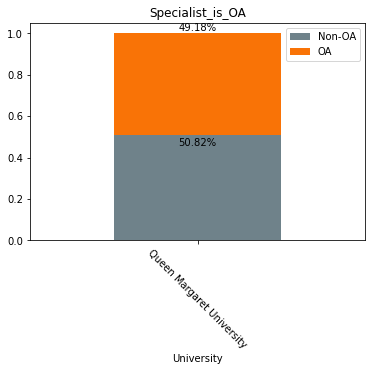

In [82]:
# Very simple one-liner using our agg_tips DataFrame.
agg_tips.plot(kind='bar', stacked=True,color=[mcolors.XKCD_COLORS['xkcd:steel grey'],mcolors.XKCD_COLORS['xkcd:orange']])


for i in range(len(agg_tips)):
    # print(round(agg_tips.values[i][0]*100, 2),agg_tips.values[i][1])
    non_oa_p = round(agg_tips.values[i][0]*100, 2)
    oa_p = round(agg_tips.values[i][1]*100, 2)
    plt.text(i,agg_tips.values[i][0]-0.05,
             f"{str(non_oa_p)}%", ha='center')
    plt.text(i,agg_tips.values[i][0]+agg_tips.values[i][1]+0.01,
             f"{str(oa_p)}%", ha='center')
    


# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Specialist_is_OA')
plt.xticks(rotation=-45, ha='center')
plt.legend(['Non-OA', 'OA'])

In [86]:
oa_perct = New_data.groupby(['University', 'Is_OA'])['Is_OA'].count()
oa_perct
true_counts = oa_perct.loc[oa_perct.index.get_level_values('Is_OA') == True]
true_counts = true_counts.reset_index(level='Is_OA', drop=True)
true_counts
filtered_Ndf = New_data[New_data['OA_Type'] != 'closed']
filtered_Ndf
oa_satus_perct = filtered_Ndf.groupby(['University', 'OA_Type'])['OA_Type'].count() /true_counts
oa_satus_perct 
agg_satus = oa_satus_perct.unstack().fillna(0) 
print(agg_satus)
# oa_satus = Ndf.groupby(['University', 'OA_Status'])['OA_Status'].count()
# # oa_satus_perct = Ndf.groupby(['University', 'OA_Status'])['OA_Status'].count()/true_counts
# # oa_satus_perct
# # print(Ndf.groupby(['University', 'OA_Status'])['OA_Status'].count())
# agg_satus = oa_satus.unstack().fillna(0)
# agg_satus_filtered = agg_satus.drop(columns='closed') 
# print(agg_satus_filtered)

OA_Type                      bronze  gold     green  hybrid
University                                                 
Queen Margaret University  0.333333  0.15  0.466667    0.05


OA_Type                      bronze  gold     green  hybrid
University                                                 
Queen Margaret University  0.333333  0.15  0.466667    0.05
[0.05] [0.33333333] [0.46666667] [0.15]


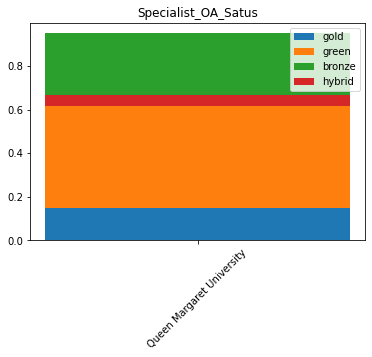

In [90]:
#groups = ['gold','green','bronze','hybrid']

oa_perct = New_data.groupby(['University', 'Is_OA'])['Is_OA'].count()
oa_perct
true_counts = oa_perct.loc[oa_perct.index.get_level_values('Is_OA') == True]
true_counts = true_counts.reset_index(level='Is_OA', drop=True)
true_counts
filtered_Ndf =New_data[New_data['OA_Type'] != 'closed']
filtered_Ndf
oa_satus_perct = filtered_Ndf.groupby(['University', 'OA_Type'])['OA_Type'].count() /true_counts
oa_satus_perct 
agg_satus = oa_satus_perct.unstack().fillna(0) 
print(agg_satus)
#closed_value =agg_satus['closed'].values
hybrid_value =agg_satus['hybrid'].values
bronze_value =agg_satus['bronze'].values
green_value =agg_satus['green'].values
gold_value =agg_satus['gold'].values
print(hybrid_value,bronze_value,green_value,gold_value)

fig, ax = plt.subplots()

#Stacked bar chart
# for i in agg_satus.columns :
#     # for j in range(len(agg_satus)) : 
#     print(np.sum(agg_satus[:i].values))
#     ax.bar(Ndf['University'].value_counts().index.values, agg_satus[i].values,bottom = np.sum(agg_satus[:i].values))
# #ax.bar(Ndf['University'].value_counts().index.values, closed_value)
# ax.bar(Ndf['University'].value_counts().index.values, hybrid_value,)
# ax.bar(Ndf['University'].value_counts().index.values, bronze_value,bottom = hybrid_value)
# ax.bar(Ndf['University'].value_counts().index.values, green_value,bottom = np.add( hybrid_value,bronze_value))
# ax.bar(Ndf['University'].value_counts().index.values, gold_value,bottom = np.add( hybrid_value,bronze_value,green_value))
ax.bar(New_data['University'].value_counts().index.values, gold_value)
ax.bar(New_data['University'].value_counts().index.values, green_value,bottom = gold_value)
ax.bar(New_data['University'].value_counts().index.values, bronze_value,bottom = np.add(gold_value,green_value))
ax.bar(New_data['University'].value_counts().index.values, hybrid_value,bottom = np.add(gold_value,green_value,bronze_value))

 
# Stacked bar plot in Python

# for i in range(len(groups)):
#     for j in range(Ndf['University'].nunique()) :
#         print(Ndf['University'].value_counts().index.values)
#     # ax.bar(Ndf['University'].value_counts().index.values,agg_satus[groups[i]].values, bottom = np.sum(agg_satus[groups[:i]].values[:i], axis = 0))
plt.title('Specialist_OA_Satus')
plt.xticks(rotation=45, ha='center')
plt.legend(['gold','green','bronze','hybrid'])
plt.show()

In [91]:
# # Very simple one-liner using our agg_tips DataFrame.
# agg_satus.plot(kind='bar', stacked=True)


# # for i in range(len(agg_tips)):
# #     # print(round(agg_tips.values[i][0]*100, 2),agg_tips.values[i][1])
# #     non_oa_p = round(agg_tips.values[i][0]*100, 2)
# #     oa_p = round(agg_tips.values[i][1]*100, 2)
# #     plt.text(i,agg_tips.values[i][0]-0.05,
# #              f"{str(non_oa_p)}%", ha='center')
# #     plt.text(i,agg_tips.values[i][0]+agg_tips.values[i][1]+0.01,
# #              f"{str(oa_p)}%", ha='center')
    


# # Just add a title and rotate the x-axis labels to be horizontal.
# plt.title('Specialist_OA_Satus')
# plt.xticks(rotation=-45, ha='center')

# plt.legend(agg_satus.columns)

In [17]:
#Ndf.to_csv("../CS5098/code/Data/Unpaywall/Specialist_AltOA.csv"